# ARIM-Academy：　基礎編　Scikit-learn（予測モデル）

## 本編の目標

この演習では、鉄の大気腐食量を気象データから予測するための『**大気腐食データセット**』を活用し、予測モデルにかかる機械学習の基礎を習得します。

### 本編における内容
* **予測アルゴリズムの習得**: このデータセットは、6か所で月次に測定された腐食量データを含んでいます。これを用いて、線形回帰やランダムフォレストなどの予測アルゴリズムを学び、腐食量の予測を実践します。

* **特徴選択と次元削減の理解**: 気象因子を特徴量とするこのデータセットを分析し、適切な特徴量の選択や次元削減を行うことで、モデルのパフォーマンスを向上させる方法を理解します。

* **モデル評価とパフォーマンス指標の理解**: データセットを使用してトレーニングしたモデルを評価し、R²などのパフォーマンス指標を用いて予測精度を評価するスキルを習得します。

* **データの可視化と解釈**: 特徴量の分布や相関関係を視覚化し、データの特性やパターンを把握する方法を学びます。これにより、モデルの解釈や予測結果の説明に役立つ洞察を得ることができます。

---

## データセット

**大気腐食データセット**は、日本の6地点における月次の標準試験片の腐食量と、当時の気象庁の観測データを組み合わせたものです。このデータセットは、松波らによる『海塩輸送シミュレーションと気象情報を用いた機械学習に基づく大気腐食量評価モデル開発と高精細腐食環境地図の作成』[1] で使用されたデータの一部に基づいています。ただし、本データセットはPython講義用に作成されたもので、論文で使用されたデータセットとは異なるものです。

[1] 松波 成行, 柳生 進二郎, 篠原 正, 片山 英樹, 須藤 仁, 服部 康男, 平口 博丸　"海塩輸送シミュレーションと気象情報を用いた機械学習に基づく大気腐食量評価モデル開発と高精細腐食環境地図の作成", 土木学会論文集A1（構造・地震工学） Vol.75, p141-160(2019) https://www.jstage.jst.go.jp/article/jscejseee/75/2/75_141/_article/-char/ja/


### 腐食観測量
1. **Corrosion**: 腐食速度 （g/m2/y）

### 気象変数
気象データは気象庁の観測値を基にしており、以下の16変数が含まれます。これらの変数は、説明変数として使用します。

1. **AT** : 平均気温（℃）  
2. **HAT** : 日最高気温の平均（℃）  
3. **LAT** : 日最低気温の平均（℃）  
4. **HT** : 最高気温（℃）  
5. **LT** : 最低気温（℃）  
6. **Rain** : 降水量の合計（mm）  
7. **MRain** : 日降水量の最大（mm）  
8. **Sun** : 日照時間（時間）  
9. **MSnow** : 最深積雪（cm）  
10. **Snow** : 降雪量合計（cm）  
11. **AW** : 平均風速（m/s）  
12. **MW** : 最大風速（m/s）  
13. **PMW** : 最大瞬間風速（m/s）  
14. **Vap** : 平均蒸気圧（hPa）  
15. **Hum** : 平均湿度（％）  
16. **LHum** : 最小相対湿度（％）
---


### 教材への接続
google colabにおけるオンラインの場合にこのラインを実行します。（<font color="red">Google colabに接続しない場合には不要</font>）

In [ ]:
!git clone https://github.com/ARIM-Academy/Advanced_Tutorial_1.git
%cd Advanced_Tutorial_1

# 1.データセットの読み込みと前処理

### ライブラリのインポート
この演習で使用するPythonライブラリをimportします。なお、機械学習に関連するscikit-learnライブラリは、後半で別途importします。

In [1]:
#ライブラリ
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



### サンプルファイルの読み込み

`pandas`ライブラリの`read_csv()`関数は、CSVファイルを読み込んで`pandas`の`DataFrame`形式に変換するための関数です。このセクションでは、[data]フォルダ内に保存されている`corrosion_data.csv`ファイルを`DataFrame`として読み込み、その結果を`df`という変数にうになっています。。

In [3]:
#データセットの読み込み
df = pd.read_csv('data/corrosin_data.csv', index_col=0)

In [4]:
#データセットの確認
df

,Month,AT,HAT,LAT,HT,LT,Rain,Mrain,Sun,Msnow,Snow,AW,MW,PMW,Vap,Hum,Lhum,Corrosion
Place,,,,,,,,,,,,,,,,,,
Naha,1,28.3,26.0,31.1,33.6,23.4,178.0,79.0,206.5,0,0,6.0,14.5,20.9,28.5,74,43,674
Naha,2,25.3,23.5,27.7,30.8,19.9,200.0,118.0,129.7,0,0,7.3,22.0,33.6,23.4,72,40,2606
Naha,3,21.3,19.1,23.8,28.5,13.9,121.0,79.0,120.0,0,0,5.0,12.7,20.6,17.4,66,34,546
Naha,4,17.3,15.0,19.6,23.6,10.3,130.0,52.0,89.4,0,0,5.4,14.5,21.5,12.7,64,37,704
Naha,5,16.8,14.1,19.8,23.5,10.6,66.0,36.5,145.4,0,0,5.0,13.1,20.2,11.8,61,32,620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Choshi,8,14.3,10.8,17.6,21.3,3.5,70.5,13.5,232.2,0,0,5.4,15.6,19.2,11.0,67,22,567
Choshi,9,18.2,15.2,21.6,26.1,12.2,151.0,56.5,257.0,0,0,5.7,21.1,26.8,16.6,78,30,541
Choshi,10,21.1,18.9,24.0,27.3,17.1,177.5,56.0,172.3,0,0,4.5,14.3,19.4,22.3,89,46,830


### 不必要な特徴量の削除
pandasライブラリではデータフレームから特定の行や列を削除する操作で`drop()`メソッドを使います。ここではデータフレームdfから観測月のインデックスである'Month'という名前の列を削除します。

In [9]:
#　記述子（特徴量）の選定および削除
df = df.drop(['Month'],axis = 1)
df

,AT,HAT,LAT,HT,LT,Rain,Mrain,Sun,Msnow,Snow,AW,MW,PMW,Vap,Hum,Lhum,Corrosion
Place,,,,,,,,,,,,,,,,,
Naha,28.3,26.0,31.1,33.6,23.4,178.0,79.0,206.5,0,0,6.0,14.5,20.9,28.5,74,43,674
Naha,25.3,23.5,27.7,30.8,19.9,200.0,118.0,129.7,0,0,7.3,22.0,33.6,23.4,72,40,2606
Naha,21.3,19.1,23.8,28.5,13.9,121.0,79.0,120.0,0,0,5.0,12.7,20.6,17.4,66,34,546
Naha,17.3,15.0,19.6,23.6,10.3,130.0,52.0,89.4,0,0,5.4,14.5,21.5,12.7,64,37,704
Naha,16.8,14.1,19.8,23.5,10.6,66.0,36.5,145.4,0,0,5.0,13.1,20.2,11.8,61,32,620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Choshi,14.3,10.8,17.6,21.3,3.5,70.5,13.5,232.2,0,0,5.4,15.6,19.2,11.0,67,22,567
Choshi,18.2,15.2,21.6,26.1,12.2,151.0,56.5,257.0,0,0,5.7,21.1,26.8,16.6,78,30,541
Choshi,21.1,18.9,24.0,27.3,17.1,177.5,56.0,172.3,0,0,4.5,14.3,19.4,22.3,89,46,830


# 2. 機械学習モデルの構築と比較

### データセットの指定
16の気象データを説明変数、腐食量を目的変数とします。

In [13]:
#腐食量（Corrosion）を目的変数として、それ以外を説明変数とする
X = df.iloc[0:, 0:16] # 説明変数
y = df.iloc[0:, -1]   # 目的変数

### 【解説】説明変数と目的変数

Pythonの操作の観点から説明変数（特徴量）と目的変数（ターゲット変数）について説明します。

機械学習や統計分析では、データセット内の変数を説明変数と目的変数に分けて扱います。

**説明変数**（または特徴量）は、データセット内の独立変数であり、予測や解析のための情報を提供します。これらの変数は、目的変数に影響を与える可能性がある特徴や属性を表しています。説明変数は、予測モデルの入力として使用され、それぞれのデータポイントに関する情報を提供します。

**目的変数**（またはターゲット変数）は、予測や分析の対象となる変数であり、説明変数に基づいて予測される値です。目的変数は、モデルが学習しようとする対象であり、予測の精度やモデルの評価に使用されます。

Pythonにおいて、データセット内の説明変数と目的変数は、通常、NumPy配列、pandasのデータフレーム、またはSciPyのスパース行列の形式で表現されます。これらのデータ構造を操作して、説明変数と目的変数を適切に抽出し、モデルの学習や予測に使用します。


In [16]:
X

,AT,HAT,LAT,HT,LT,Rain,Mrain,Sun,Msnow,Snow,AW,MW,PMW,Vap,Hum,Lhum
Place,,,,,,,,,,,,,,,,
Naha,28.3,26.0,31.1,33.6,23.4,178.0,79.0,206.5,0,0,6.0,14.5,20.9,28.5,74,43
Naha,25.3,23.5,27.7,30.8,19.9,200.0,118.0,129.7,0,0,7.3,22.0,33.6,23.4,72,40
Naha,21.3,19.1,23.8,28.5,13.9,121.0,79.0,120.0,0,0,5.0,12.7,20.6,17.4,66,34
Naha,17.3,15.0,19.6,23.6,10.3,130.0,52.0,89.4,0,0,5.4,14.5,21.5,12.7,64,37
Naha,16.8,14.1,19.8,23.5,10.6,66.0,36.5,145.4,0,0,5.0,13.1,20.2,11.8,61,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Choshi,14.3,10.8,17.6,21.3,3.5,70.5,13.5,232.2,0,0,5.4,15.6,19.2,11.0,67,22
Choshi,18.2,15.2,21.6,26.1,12.2,151.0,56.5,257.0,0,0,5.7,21.1,26.8,16.6,78,30
Choshi,21.1,18.9,24.0,27.3,17.1,177.5,56.0,172.3,0,0,4.5,14.3,19.4,22.3,89,46




### 標準化  
モデルはデータのスケールに敏感であるため、次元削減を行う前にデータを標準化することが重要です。標準化とは、各特徴量を平均0、標準偏差1にスケーリングする手法で、異なるスケールを持つ特徴量を均等に扱えるようにします。これにより、モデルが特徴量のスケールに影響されず、データ全体の構造を正確に反映することが可能に

標準化は、pythonではScikit-learnライブラリで提供されている`StandardScaler`クラスで、データの標準化を簡単に行うことができます。なります。

In [19]:
from sklearn.preprocessing import StandardScaler

In [21]:
# データの標準化
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

### データセットの分割（Data set splitting）
機械学習モデルの性能を正確に評価するためには、モデルを学習させる**訓練データ**と、学習済みのモデルの性能を評価するための**テストデータ**にデータを分割する必要があります。scikit-learnの`train_test_split()`関数を使用すると、この分割を簡単に実行できます。

In [24]:
#データセットの分割
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, 
                                                    test_size = 0.1,   # CV用データ分割
                                                    random_state = 42
                                                    )  



#### 【解説】データセットの分割

`train_test_split`関数は、PythonのScikit-learnライブラリで提供される便利なツールで、データセットをトレーニングデータとテストデータに分割するために使用されます。機械学習モデルを構築する際、データセットを適切に分割してモデルの学習と評価を行うことが重要です。

**トレーニングデータ**を使ってモデルを学習し、**テストデータ**を使ってそのモデルのパフォーマンスを評価します。これにより、モデルが未知のデータに対してどの程度適切に予測できるかを確認できます。

`train_test_split`関数の基本的な使い方は以下の通りです：

```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

- **`X`** は説明変数（特徴量）のデータセットを表し、**`y`** は目的変数（ターゲット変数）のデータセットを表します。
- **`test_size`**: テストデータの割合を指定します。例えば、`test_size=0.2`と指定すると、データセットの20%がテストデータに、残りの80%がトレーニングデータになります。
- **`random_state`**: 乱数シードを指定することで、データの分割を再現可能にします。同じ`random_state`を指定すると、分割結果が毎回同じになります。

このコードを実行すると、指定したデータセットがトレーニングデータ（`X_train`、`y_train`）とテストデータ（`X_test`、`y_test`）に分割されます。これにより、トレーニングデータを使ってモデルを訓練し、テストデータを用のワークフローにおいて非常に重要なステップです。

In [27]:
X_train

array([[ 1.03120003,  0.93245363,  1.14266015, ...,  1.01509118,
         0.68645297,  0.85825371],
       [ 0.94916619,  1.04226526,  0.78741606, ...,  0.80161635,
         0.23828597,  0.42912685],
       [ 0.58001391,  0.61522005,  0.66900136, ...,  0.49326382,
         0.79849472, -0.64369028],
       ...,
       [ 0.23820624,  0.29798647,  0.06212602, ...,  0.24420986,
         1.02257822,  0.21456343],
       [ 0.01944934,  0.21257743, -0.24871256, ..., -0.28947721,
        -0.43396452,  0.57216914],
       [-2.1271028 , -2.27648604, -1.84731101, ..., -1.53474704,
        -1.44234027, -1.43042284]])

### モデル選択
scikit-learnは、機械学習モデルの実装や評価を支援するための豊富なツールセットを提供しています。予測タスクにおいて、scikit-learnではさまざまなアルゴリズムが利用可能です。モデルの選択は、データの特性やタスクの要件に基づいて行う必要があります。

以下に、scikit-learnの予測モデルの一部とその特徴を紹介します。

1. **サポートベクターマシン（Support Vector Machines, SVM）**
   - 線形または非線形の分類を行います。
   - マージン最大化を通じて境界を定義し、データを分類します。
   - データの分離が明確でない場合や、高次元のデータセットに適しています。

2. **決定木（Decision Trees）**
   - 非線形な分類を行うためのモデルで、条件に基づいてデータを分割します。
   - データの特徴量の重要度を理解することができます。

3. **ランダムフォレスト（Random Forests）**
   - 複数の決定木を組み合わせたアンサンブル学習法であり、分類の正確性と汎化能力を向上させます。
   - 高い精度が要求される場合や、特徴量の重要度を評価したい場合に使用されます。

4. **ニューラルネットワーク（Neural Networks）**
   - 複数の層で構成されたネットワークを使用して、非線形な分類を行います。
   - 大規模なデータセットや高度なパターンの抽出が必要な場合に適しています。

## 1. 線形重回帰
機械学習で最も汎用的なモデルの一つである線形重回帰モデルを作成してみましょう。 単回帰分析と同様に、複数の説明変数を用いて目的変数を予測するモデルです。

### ①　モデル構築
LinearRegression クラスは、Scikit-learnライブラリから提供される線形回帰モデルのクラスです。線形重回帰では、複数の特徴量（独立変数）を使用して目的変数（従属変数）を予測するモデルを構築します。

In [32]:
# 線形回帰モデル
from sklearn.linear_model import LinearRegression

#予測器の作成
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### ②　特徴量の評価（重要度）
線形回帰モデルの係数（重み）と切片を出力しましょう。また、線形回帰モデルの係数をPandasのSeries型に変換することで、各説明変数が目的変数に与える影響をより視覚的に捉えやすくなります。これにより、モデルの解釈が容易になり、より深い分析が可能になります。

In [35]:
#係数（重み）と切片
print('係数：',model.coef_)
print('切片：',model.intercept_)

係数： [-3952.58929155  2318.17620899  1699.55454249  -200.52949204
   381.11598997   -45.73435848   -12.2553018    -49.25127598
 -2306.61305547  2302.42867058   251.53460863  -589.00126328
   774.45398591   216.69309221  -175.64217431   -44.52189166]
切片： 741.9109174228892


In [37]:
#係数をPandasのSeries型に変換
coef = pd.Series(model.coef_, index = X.columns)
coef

AT      -3952.589292
HAT      2318.176209
LAT      1699.554542
HT       -200.529492
LT        381.115990
Rain      -45.734358
Mrain     -12.255302
Sun       -49.251276
Msnow   -2306.613055
Snow     2302.428671
AW        251.534609
MW       -589.001263
PMW       774.453986
Vap       216.693092
Hum      -175.642174
Lhum      -44.521892
dtype: float64

### 可視化
線形回帰モデルの各説明変数の係数を棒グラフで可視化し、どの説明変数が目的変数に最も大きな影響を与えているかを視覚的に確認してみましょう。

* **直感的な理解**: 棒グラフの長さによって、各説明変数の影響の大きさを一目瞭然にわかります。
* **重要変数の特定**: 絶対値が大きい係数を持つ変数が、目的変数に大きな影響を与えていることがわかります。
* **正負の判断**: 係数の符号から、説明変数と目的変数の関係が正の相関か負の相関かがわかります

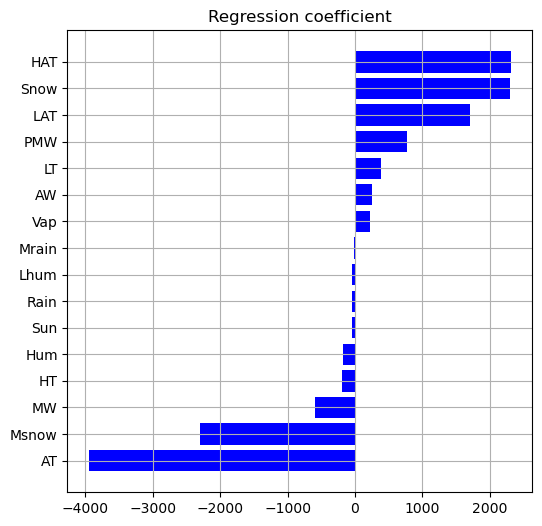

In [40]:
# 回帰係数の可視化
fig, ax = plt.subplots(figsize=(6,6))

imp_coef = coef.sort_values()

ax.barh(imp_coef.index,
        imp_coef,
        color ='blue')

ax.grid()
plt.title('Regression coefficient') 

plt.show() 

### ③　モデルの評価：精度の計算
モデルの汎化性能を評価するために、決定係数（R²スコア）を用いて訓練データとテストデータのスコアを比較します。

**過学習**: モデルが訓練データに過度に適合し、新しいデータに対しては性能が低下する現象です。訓練データのR²スコアが高く、テストデータのR²スコアが低い場合、過学習が疑われます。  
**汎化性能**: モデルが未知のデータに対しても高い予測精度を示す能力です。訓練データとテストデータのR²スコアが近い場合、モデルは汎化性能が高いと考えられます。  
す。
### 訓練データ

In [43]:
#予測値
y_pred_train = model.predict(X_train)

In [45]:
# 訓練データの精度
r2_score = model.score(X_train, y_train)
print('訓練データ決定係数:{:.3f}'.format(r2_score))

訓練データ決定係数:0.829


### テストデータ

In [48]:
#テストデータの予測値
y_pred_test = model.predict(X_test)

In [50]:
# テストデータの精度
r2_score = model.score(X_test, y_test)
print('テストデータ決定係数:{:.3f}'.format(r2_score))

テストデータ決定係数:0.764


### ④　観測値-予測値プロット
機械学習モデルの予測結果と実際の観測値を散布図で可視化したグラフです。このプロットは、モデルの予測精度を評価し、予測誤差の傾向を把握する上で非常に有効です。

**理想的なプロット**: 予測値と観測値がほぼ一致する場合、データ点が対角線上に近接して分布します。これは、モデルがデータの傾向を正しく捉えていることを示します。  
**誤差の傾向**: データ点が対角線から大きく外れている場合、モデルの予測に誤差が含まれていることを示します。また、誤差が特定の範囲で偏っている場合、モデルに改善の余地があることを示唆します。  

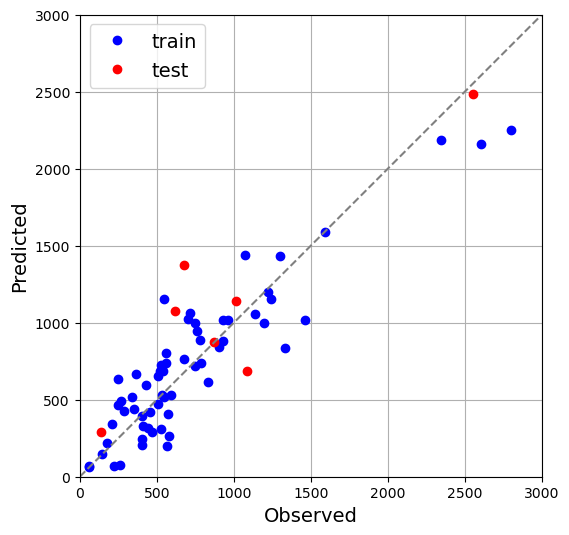

In [53]:
fig, ax = plt.subplots(figsize=(6,6))

#データのプロット
ax.plot(y_train, y_pred_train, 'o', c = 'blue', label ='train')
ax.plot(y_test, y_pred_test, 'o', c = 'red', label ='test')

# 対角線のプロット
ax.plot([0, 3000], [0, 3000], 
        linestyle='--', 
        color ='gray')  

#グラフの修飾
ax.axis('square')
ax.set_xlabel('Observed',fontsize = 14)
ax.set_ylabel('Predicted',fontsize = 14)

ax.set_xlim(0,3000)
ax.set_ylim(0,3000)
ax.legend(fontsize = 14)
ax.grid()

plt.show()

## 2.Lasso回帰

Lasso回帰は、線形回帰モデルにL1正則化項を追加することで、特徴選択と過学習防止という二つの効果を実現する手法です。

**【1】特徴選択**  
L1正則化項は、モデルの複雑さを抑える働きがあり、多くの場合、一部の回帰係数を厳密に0にします。これにより、目的変数にほとんど影響を与えない無関係な特徴量を自動的にモデルから除外することができます。この特徴選択機能は、高次元のデータにおいて、モデルの解釈性を高め、過学習を防ぐ上で非常に有効です。

**【2】過学習防止**  
L1正則化は、モデルの複雑さを制限することで、過学習を抑制します。過学習とは、モデルが訓練データに過度に適合しすぎてしまい、新しいデータに対しては予測精度が低下する現象です。Lasso回帰は、この過学習問題に対処し、モデルの汎化性能を向上させることができます。  


Lasso回帰は、特徴量が多く、モデルの解釈性や汎化性能を重視する場面で特に有効な手法です。特徴選択と過学習防止という二つの効果を同時に実現できるため、様々な分野で活用されています。

### ①　モデル構築
Lasso は、Scikit-learnライブラリから提供されるLasso回帰のクラスよりインスタンスを作成することができます。特徴量（説明変数）と目的変数の設定についても線形重回帰と同じ手続きで進められます。

In [57]:
# Lasso回帰モデル
from sklearn.linear_model import Lasso

#予測器の作成
model = Lasso()
model.fit(X_train, y_train)

Lasso()

### ②　特徴量の評価（重要度）

In [60]:
#係数（重み）と切片
print('係数：',model.coef_)
print('切片：',model.intercept_)

係数： [ -92.84523428    0.           -0.         -156.83813755  487.45353743
 -101.58514893   10.26075815  -86.28887154   -3.69068057   -3.22874175
  202.48798271 -477.01146337  686.41788517  174.58523062 -124.88274183
  -53.85873523]
切片： 737.2917977685635


In [62]:
coef = pd.Series(model.coef_, index = X.columns)
coef

AT       -92.845234
HAT        0.000000
LAT       -0.000000
HT      -156.838138
LT       487.453537
Rain    -101.585149
Mrain     10.260758
Sun      -86.288872
Msnow     -3.690681
Snow      -3.228742
AW       202.487983
MW      -477.011463
PMW      686.417885
Vap      174.585231
Hum     -124.882742
Lhum     -53.858735
dtype: float64

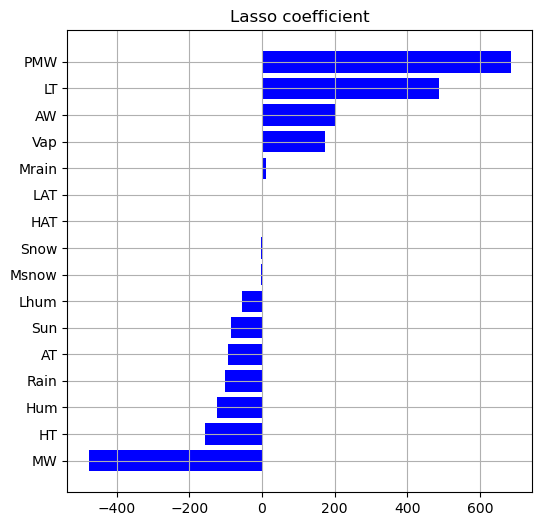

In [64]:
# 回帰係数の可視化
fig, ax = plt.subplots(figsize=(6,6))

imp_coef = coef.sort_values()

ax.barh(imp_coef.index,
        imp_coef,
        color ='blue')

ax.grid()
plt.title('Lasso coefficient') 

plt.show() 

### ③　モデルの評価：精度の計算
### 訓練データ

In [67]:
#予測値
y_pred_train = model.predict(X_train)

In [69]:
# 訓練データの精度
r2_score = model.score(X_train, y_train)
print('訓練データ決定係数:{:.3f}'.format(r2_score))

訓練データ決定係数:0.814


### テストデータ

In [72]:
#テストデータの予測値
y_pred_test = model.predict(X_test)

In [74]:
# 訓練データの精度
r2_score = model.score(X_test, y_test)
print('テストデータ決定係数:{:.3f}'.format(r2_score))

テストデータ決定係数:0.751


### ④　観測値-予測値プロット

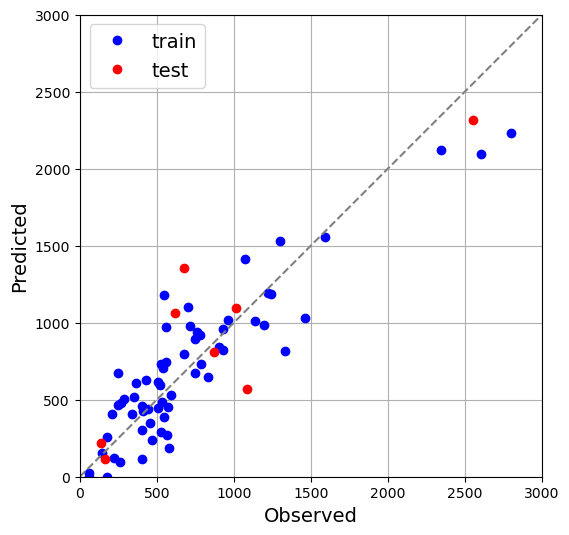

In [77]:
fig, ax = plt.subplots(figsize=(6,6))

#データのプロット
ax.plot(y_train, y_pred_train, 'o', c = 'blue', label ='train')
ax.plot(y_test, y_pred_test, 'o', c = 'red', label ='test')

# 対角線のプロット
ax.plot([0, 3000], [0, 3000], 
        linestyle='--', 
        color ='gray')  

#グラフの修飾
ax.axis('square')
ax.set_xlabel('Observed',fontsize = 14)
ax.set_ylabel('Predicted',fontsize = 14)

ax.set_xlim(0,3000)
ax.set_ylim(0,3000)
ax.legend(fontsize = 14)
ax.grid()

plt.show()

## 3. ランダムフォレスト

ランダムフォレストは、複数の決定木をランダムに組み合わせることで、高い予測精度と安定性を両立させたアンサンブル学習モデルです。主な特徴は以下の通りです。

**【1】アンサンブル学習による高精度化と過学習防止**  
複数の決定木を組み合わせることで、単一の決定木よりもより複雑なパターンを学習し、予測精度を高めることができます。また、各決定木は異なる特徴量を重視するため、特定の特徴量に過度に依存してしまうことを防ぎ、過学習のリスクを低減します。

**【2】特徴量の重要度評価**  
ランダムフォレストは、各特徴量が予測にどれだけ貢献しているかを定量的に評価する機能を持っています。この機能を活用することで、重要な特徴量を特定し、モデルの解釈性を高めることができます。  

ランダムフォレストは、高い予測精度と解釈性の両方を兼ね備えた強力な機械学習モデルです。様々な分野で活用されており、特に特徴量が多く、複雑なデータに対して有効です。

### ①　モデル構築
`RandomForestRegressor()` は、Scikit-learnにおけるランダムフォレスト回帰のクラスです。RandomForestRegressor(n_estimators=10) で、10本の決定木を使用するランダムフォレスト回帰モデルを作成しています。なお、`n_estimators` は、ランダムフォレストに含まれる決定木の数を指定するパラメータです。

In [81]:
#ランダムフォレスト回帰
from sklearn.ensemble import RandomForestRegressor

#予測器の作成
model = RandomForestRegressor(n_estimators=10)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

### ②　特徴量の評価（重要度）

In [84]:
coef = pd.Series(model.feature_importances_, index = X.columns)
coef

AT       1.718690e-02
HAT      9.120968e-02
LAT      1.107975e-02
HT       4.170466e-03
LT       4.855197e-02
Rain     2.743546e-02
Mrain    6.767113e-03
Sun      5.826431e-03
Msnow    0.000000e+00
Snow     1.215263e-07
AW       1.675484e-01
MW       3.038722e-01
PMW      1.088048e-01
Vap      2.832872e-03
Hum      9.253719e-03
Lhum     1.954602e-01
dtype: float64

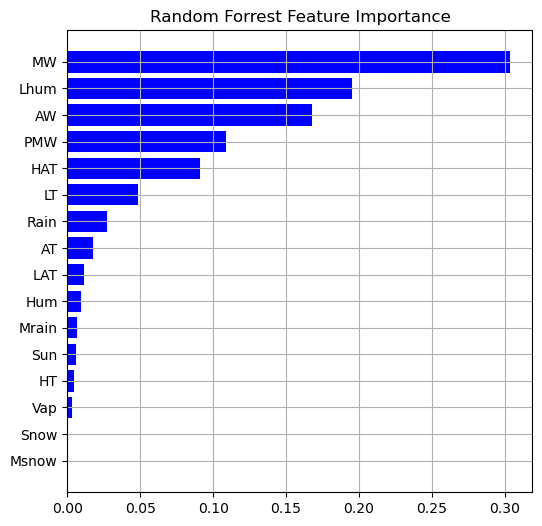

In [86]:
# 回帰係数の可視化
fig, ax = plt.subplots(figsize=(6,6))

imp_coef = coef.sort_values()

ax.barh(imp_coef.index,
        imp_coef,
        color ='blue')

ax.grid()
plt.title('Random Forrest Feature Importance') 
plt.show()

### ③　モデルの評価：精度の計算
### 訓練データ

In [89]:
#予測値
y_pred_train = model.predict(X_train)

In [91]:
# 訓練データの精度
r2_score = model.score(X_train, y_train)
print('訓練データ決定係数:{:.3f}'.format(r2_score))

訓練データ決定係数:0.941


### テストデータ

In [94]:
#テストデータの予測値
y_pred_test = model.predict(X_test)

In [96]:
# 訓練データの精度
r2_score = model.score(X_test, y_test)
print('テストデータ決定係数:{:.3f}'.format(r2_score))

テストデータ決定係数:0.853


### ④　観測値-予測値プロット

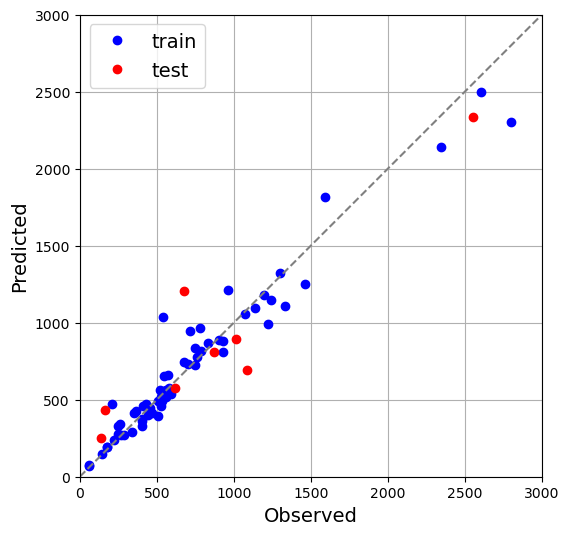

In [99]:
fig, ax = plt.subplots(figsize=(6,6))

#データのプロット
ax.plot(y_train, y_pred_train, 'o', c = 'blue', label ='train')
ax.plot(y_test, y_pred_test, 'o', c = 'red', label ='test')

# 対角線のプロット
ax.plot([0, 3000], [0, 3000], 
        linestyle='--', 
        color ='gray')  

#グラフの修飾
ax.axis('square')
ax.set_xlabel('Observed',fontsize = 14)
ax.set_ylabel('Predicted',fontsize = 14)

ax.set_xlim(0,3000)
ax.set_ylim(0,3000)
ax.legend(fontsize = 14)
ax.grid()

plt.show()

## Closing：おわりに


さらに機械学習モデルの精度をあげるために、**k-foldクロスバリデーション**や**ハイパーパラメータ調整**を行います。

**k-foldクロスバリデーション（k-fold cross-validation）**  

機械学習モデルの性能を評価するための手法です。通常、データセットをトレーニングセットとテストセットに分割してモデルを評価しますが、クロスバリデーションでは、データセットを複数の部分集合に分割し、それぞれをトレーニングセットとテストセットとして使用します。

具体的な手順は以下の通りです。

1. データセットをk個の部分集合（フォールド）に分割します。通常、kは5または10がよく使用されます。

1. k個の部分集合のうちの1つをテストセットとし、残りのk-1個の部分集合をトレーニングセットとします。

1. モデルをトレーニングセットで学習させ、テストセットで評価します。

1. ステップ2-3をk回繰り返し、k個のモデルを作成し、評価します。

1. k回の評価結果を平均化し、モデルの性能を推定します。

クロスバリデーションは、モデルの性能を正確に評価するために使用されます。各フォールドがテストセットとして使用されるため、全てのデータがモデルの評価に使用されるため、モデルの性能評価がより信頼性の高い結果を提供します。また、データの分割方法による結果のバイアスを軽減する効果もあります。

クロスバリデーションは、ハイパーパラメータのチューニングや異なるモデルの比較など、機械学習のさまざまなタスクで広く使用されます。

**ハイパーパラメータ（hyperparameter）**  

機械学習モデルのハイパーパラメータは、モデルの振る舞いやパフォーマンスに影響を与える設定値です。ハイパーパラメータの適切な調整は、モデルの性能を最適化するために非常に重要です。ハイパーパラメータ調整の一般的な手法には、グリッドサーチ、ランダムサーチ、ベイズ最適化などがあります。

* **グリッドサーチ（Grid Search）**：
グリッドサーチでは、事前に指定されたハイパーパラメータ値の組み合わせの中から最適な組み合わせを探索します。具体的には、調整したいハイパーパラメータの範囲を指定し、それらのパラメータの組み合わせをすべて試して最適な組み合わせを見つける手法です。ただし、組み合わせの数が非常に多い場合は計算コストが高くなる可能性があります。

* **ランダムサーチ（Random Search）**：
ランダムサーチでは、ハイパーパラメータの範囲内からランダムに組み合わせを選択し、それらの組み合わせでモデルを評価します。グリッドサーチと比較して効率的な探索が可能であり、特定の範囲内でのハイパーパラメータの重要度を把握するのに役立ちます。

* **ベイズ最適化（Bayesian Optimization）**：
ベイズ最適化は、事前の知識を利用して最適なハイパーパラメータを探索する手法です。モデルの評価結果を利用して、パラメータ空間内で最適な探索を行います。ベイズ最適化は、少ない評価回数で最適なハイパーパラメータを見つけることができる場合があります。

これらの手法は、ハイパーパラメータの探索空間と目的関数の特性に合わせて選択する必要があります。また、クロスバリデーションなどを使用して、ハイパーパラメータの選択によるモデルの性能を適切に評価することも重要です。